# Camera Calibration & Geometry of Image Formation

## - References

    - https://learnopencv.com/camera-calibration-using-opencv/
    - https://learnopencv.com/geometry-of-image-formation/
    - https://www.kaggle.com/code/soumya044/camera-calibration/notebook
    - https://darkpgmr.tistory.com/32
    - https://darkpgmr.tistory.com/107
    - https://darkpgmr.tistory.com/31
    - https://www.mathworks.com/help///visionhdl/ug/image-undistort.html

## - Camera calibration

    - The process of estimating the parameters of a camera
    
    - Get all the information (parameters or coefficients) about the camera required to determine an accurate relationship between a 3D point in the real world and its corresponding 2D projection (pixel) in the image captured by that calibrated camera
    
    - Recovering follow two parameters
        - Internal parameters (Intrinsic calibration)
        - External parameters (Extrinsic calibration)

## - Internal parameters (Intrinsic calibration)

    - Focal length, principal point, skew coefficient

## - External parameters (Extrinsic calibration)

    - Represented as Rotation & Translation
    
    - A parameter that describes the transformation relationship between the camera coordinate system and the world coordinate system.
    
    - Since camera external parameters are not unique to the camera, it depends on where the camera is installed, and also depends on how the world coordinate system is defined.

## - World coordinate system and the camera coordinate system

    - Figure 1: The World Coordinate System and the Camera Coordinate System

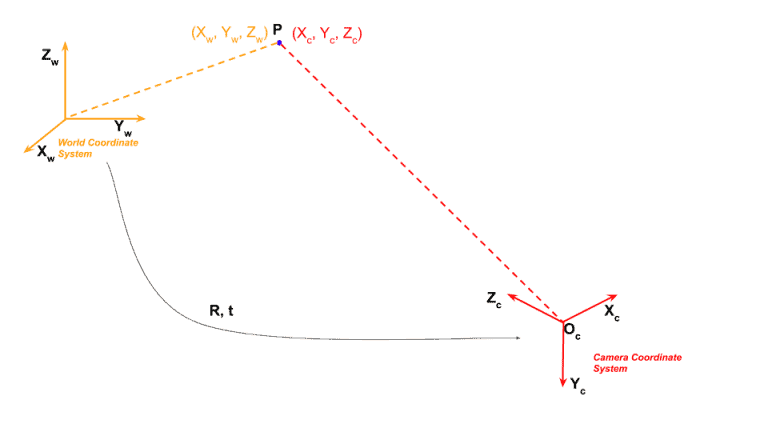

    - Setup
        - Given a 3D point P in this room
        - Searching the pixel coordinates (u, v) of P in the image taken by the camera.
    
    - The World Coordinate System and the Camera Coordinate System are related by a Rotation and a Translation (Extrinsic calibration)
    
    - Location of camera in world coordinates
        - Camera is located at some arbitrary location in the room.
        - The camera coordinate is translated by equations (1) with respect to the world coordinates.

\begin{equation*} t_x, t_y, t_z\quad (1) \end{equation*}
    

## - Rotation

    - The camera may be also looking in some arbitrary direction. This means that the camera is rotated with respect to the world coordinate system.
    
    - Rotation in 3D is captured using three parameters (yaw, pitch, and roll)
    
    - It is often convenient for mathematical manipulation to encode rotation as a 3×3 matrix.        

## - Relation between the world coordinates and the camera coordinates

    - Point P which had equations (2) in the world coordinates will have different equations (3) in the camera coordinate system. (red color of figure 1)
    
    - The world coordinate and the camera coordinates are related by a rotation matrix R and a 3 element translation vector t (equation 4)
        
\begin{equation*} X_w, Y_w, Z_w\quad (2) \end{equation*}
\begin{equation*} X_c, Y_c, Z_c\quad (3) \end{equation*}

\begin{equation*} \begin{bmatrix} X_c\\ Y_c\\ Z_c  \end{bmatrix}= \mathbf{R} \begin{bmatrix} X_w\\ Y_w\\ Z_w  \end{bmatrix} + \mathbf{t} \quad (4) \end{equation*}

## - Homogenous coordinates

    - A point in homogenous coordinate (X, Y, Z, W) is the same as the point (X/W, Y/W, Z/W) in cartesian coordinates.

\begin{equation*} \begin{bmatrix} X_c\\ Y_c\\ Z_c  \end{bmatrix}= \begin{bmatrix} \mathbf{R} | \mathbf{t} \end{bmatrix} \begin{bmatrix} X_w\\ Y_w\\ Z_w \\ 1 \end{bmatrix} \quad (5) \end{equation*}

## - Extrinsic matrix P

\begin{equation*} \mathbf{P} = \begin{bmatrix} \mathbf{R} | \mathbf{t} \end{bmatrix} \quad (6) \end{equation*}

## - Image (pixel) coordinate system

    - Figure 2: A Simple Pin Hole Camera

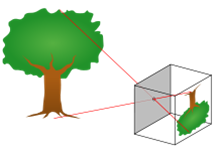

        - An external image passes through one needle hole (lens) in a straight line and is formed on the opposite wall (image sensor)

    - Figure 3: Details of Pin Hole Camera

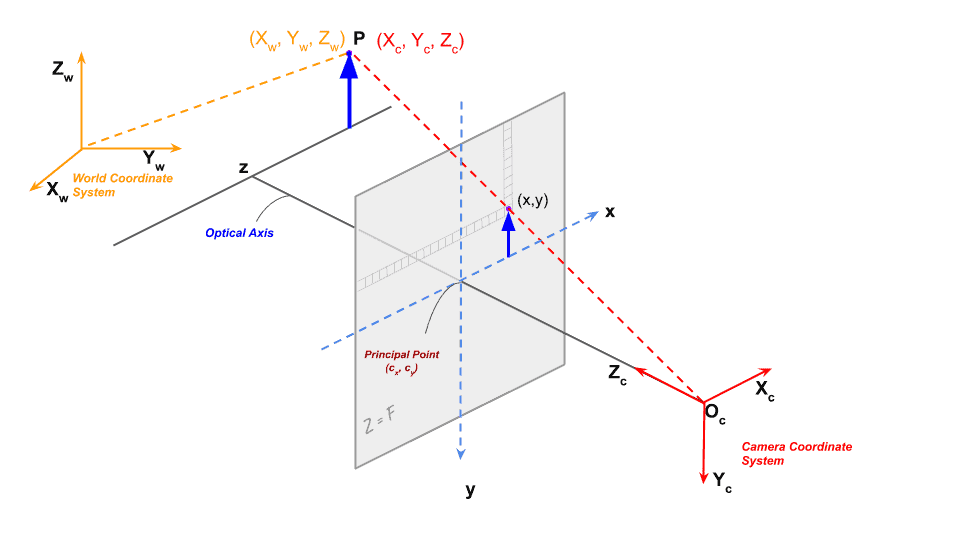

## - Focal length

    - Distance from the center of the lens to the image sensor
    
    - Center of the lengs: Optical Center, Image sensor: image plane
    
    - Optical center is defined as follow equation 7.

\begin{align*} (c_x, c_y) \quad (7) \end{align*}

    - The image plane is placed at a distance of focal length from the optical center

## - Project image (x,y) of the 3D point

\begin{align*} x &= f \frac{X_c}{Z_c} \quad (8) \\ y &= f \frac{Y_c}{Z_c} \quad (9) \end{align*}

## - Two equations can be rewritten in matrix form as follow equation 10.

\begin{align*} \begin{bmatrix} x' \\ y' \\ z'  \end{bmatrix} =  \begin{bmatrix} f & 0 & 0 \\ 0 & f & 0 \\ 0 & 0 & 1  \end{bmatrix} \begin{bmatrix} X_c\\ Y_c\\ Z_c  \end{bmatrix} \quad (10) \end{align*}

## - Intrinsic matrix K

\begin{align*} \mathbf{K} =  \begin{bmatrix} f & 0 & 0 \\ 0 & f & 0 \\ 0 & 0 & 1  \end{bmatrix} \quad (11) \end{align*}

    - Pixels in the image sensor may not be square. So we may have two different focal lengths as follow equation 12.

\begin{align*} f_x, f_y \quad (12) \end{align*}

    - Optical center of the camera may not coincide with the center of the image coordinate system
    
    - In addition, there may be a small skew gamma between the x and y axes of the camera sensor.
    
    - Figure 4: Change of Image Plate According to Skew

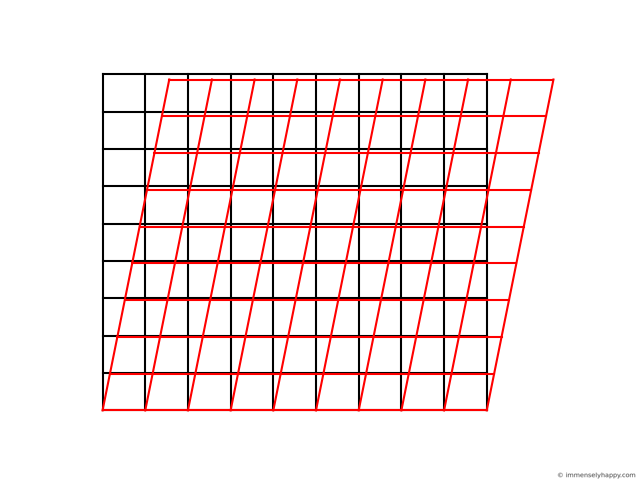

    - Intrinsic matrix K can be rewritten in matrix form as follow equation 13.

\begin{align*} \mathbf{K} =  \begin{bmatrix} f_x & \gamma & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1  \end{bmatrix} \quad (13) \end{align*}

## - Scenario of the image pixel coordinate system

    - Figure 5: showing a more realistic scenario when the image pixel coordinate system has the origin on the top left corner

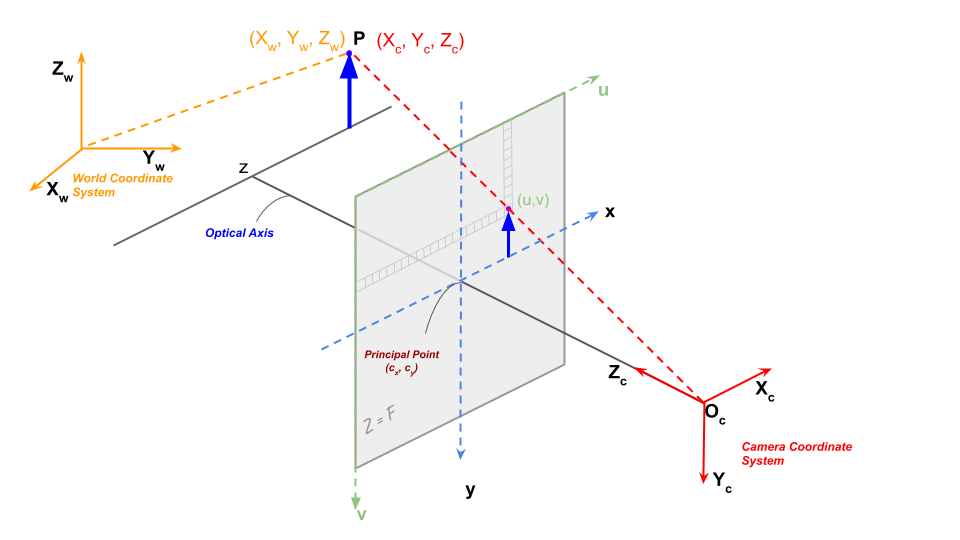

    - The intrinsic camera matrix needs to take into account the location of the principal point, the skew of the axes, and potentially different focal lengths along different axes

\begin{align*} \begin{bmatrix} u' \\ v' \\ w'  \end{bmatrix} =  \begin{bmatrix} f_x & \gamma & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1  \end{bmatrix} \begin{bmatrix} X_c\\ Y_c\\ Z_c  \end{bmatrix} \quad (14) \end{align*}

\begin{align*} u &= \frac{u'}{w'} \quad (15) \\ v &= \frac{v'}{w'} \quad (16) \end{align*}

 ## - Lens distortion

     - Using a wide-angle lens with a wide field of view, can see a wide range, but this causes relatively severe image distortion.
    
    - Two distortion of Pin Hole Camera
        - Radial distortion
        - Tangential distortion

## - Radial distortion

    - Related with refractive index of a convex lens
    
    - Occurs when light rays bend more near the edges of a lens than they do at its optical center
    
    - Distortion in which the degree of distortion of the image is determined by the distance from the center
    
    - Figure 6: radial distortion

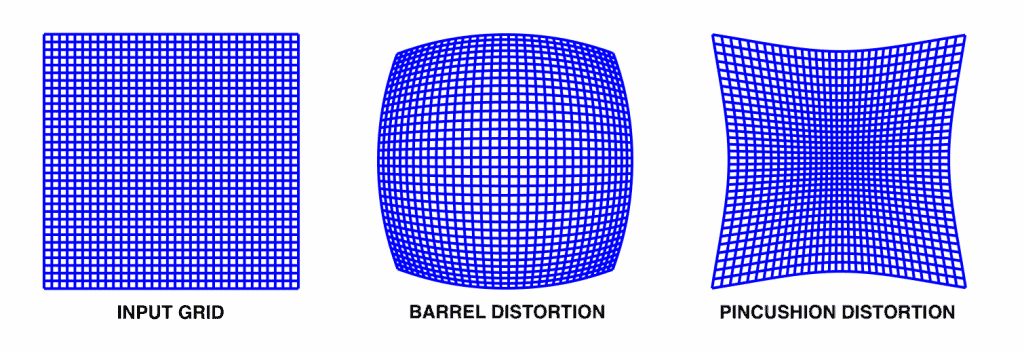

## - Tangential distortion

    - Occurs when the lens and the image plane are not parallel.
    
    - Figure 7: tangential distortion

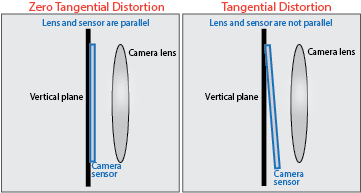

## - Projection in undistortion  

    - Assuming that there is no lens system distortion, projection of 3d point (equation 17) to 2d point in normalized image plane as follow equation 18.
    
    - u: undistorted
    
\begin{align*} X_c, Y_c, Z_c \quad (17) \end{align*}

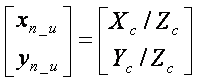 \begin{align*} \quad (18) \end{align*}

## - Projection in distortion  

    - In realistic, 2d points have a distortion due to non-linearity of the lens (mainly radial distortion)
    
    - The first term on the right-hand side = radial distance, the second term on the right-hand side = tangential distortion
    
    - radial coefficient: equation 19, tangential distortion coefficient: equation 20
    
    - principal point in undistortion: equation 21
    
    - d: distorted

\begin{align*} k_1, k_2, k_3 (19) \\ p_1, p_2 (20) \\ r_u (21) \end{align*}

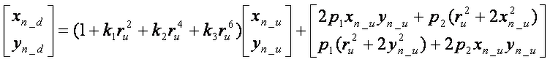 \begin{align*} \quad (22) \end{align*}

    - Pixel point of image plane (not normalized): equation 23, 24

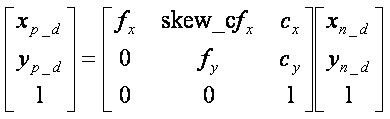  \begin{align*} \quad (23) \end{align*}

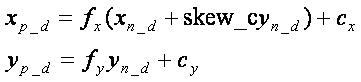 \begin{align*} \quad (24) \end{align*}

## - Undistortion algorithm

    - Specify the intrinsic matrix and distortion coefficients
    
    - Maps the coordinates of the output undistorted image to the input camera image by using distortion coefficients.

    - Figure 8: Process of image undistortion algorithm
    
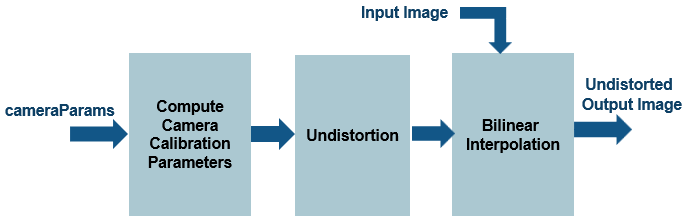

# Simple Camera calibration Test Code (Undistortion)

In [1]:
import numpy as np
import cv2
import glob
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

## - Create objects points in World Coordinates

In [2]:
# Board pattern size = (7, 10)
pattern_size = (9, 6)
# (0,0,0), (1,0,0), ...
obj_point = np.zeros((pattern_size[0]*pattern_size[1],3), np.float32)
# axis of z = 0
obj_point[:,:2] = np.mgrid[0:pattern_size[0],0:pattern_size[1]].T.reshape(-1,2)

In [3]:
print('obj_point:', len(obj_point))
print('obj_point:', obj_point[:10])

obj_point: 54
obj_point: [[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]]


## - Capture multiple images of the checkerboard from different viewpoints

In [4]:
image_path_list = glob.glob('./camera_cal/*.jpg')

In [5]:
# 20 images of different viewpoints
len(image_path_list), image_path_list

(20,
 ['./camera_cal/calibration19.jpg',
  './camera_cal/calibration12.jpg',
  './camera_cal/calibration4.jpg',
  './camera_cal/calibration18.jpg',
  './camera_cal/calibration9.jpg',
  './camera_cal/calibration20.jpg',
  './camera_cal/calibration1.jpg',
  './camera_cal/calibration16.jpg',
  './camera_cal/calibration6.jpg',
  './camera_cal/calibration10.jpg',
  './camera_cal/calibration17.jpg',
  './camera_cal/calibration3.jpg',
  './camera_cal/calibration11.jpg',
  './camera_cal/calibration15.jpg',
  './camera_cal/calibration14.jpg',
  './camera_cal/calibration5.jpg',
  './camera_cal/calibration8.jpg',
  './camera_cal/calibration7.jpg',
  './camera_cal/calibration13.jpg',
  './camera_cal/calibration2.jpg'])

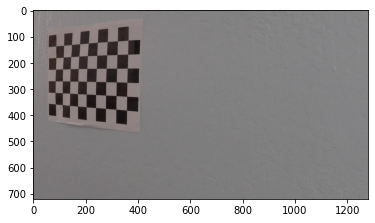

In [6]:
imshow(cv2.imread(image_path_list[0]))

## - Calibrator

### - cv2.findChessboardCorners(chess_image, pattern_size, ...)
    - Looking for a checkerboard and returns the coordinates of the corners
    - Returns
        - corners: output array of detected corners.

### - cv2.calibrateCamera(3d_object_points, 2d_image_points, ...)
    - Paper: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr98-71.pdf
    - Pass the 3D points in world coordinates and their 2D locations in all images
    - Returns
        - camera_matrix: Intrinsic camera matrix
        - dist_coeffs: Lens distortion coefficients.
        - rotation: Rotation specified as a 3×1 vector. The direction of the vector specifies the axis of rotation and the magnitude of the vector specifies the angle of rotation.
        - translation: 3×1 Translation vector.

In [7]:
# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [8]:
def calibrator(image_path_list, obj_point, pattern_size, criteria):
    # Store object points and image points from all the images.
    obj_points = [] # 3d point in real world space
    img_points = [] # 2d points in image plane.
    
    for fname in image_path_list:
        img = cv2.imread(fname)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray_img, pattern_size, None)
        #print('corners:', corners)

        # If found, add object points, image points (after refining them)
        if ret:
            print('Shape of corners:', corners.shape)
            obj_points.append(obj_point)
            img_points.append(corners)
            
            corners2 = cv2.cornerSubPix(gray_img, corners, (11,11), (-1,-1), criteria)
            
            # Draw and display the corners
            cv2.drawChessboardCorners(img, (7,6), corners2, ret)
            imshow(img)
            cv2.waitKey(500)
        
    #print('obj_points:', obj_points)
    #print('img_points:', img_points)

    ret, camera_matrix, dist_coeffs, rotation, translation = cv2.calibrateCamera(obj_points,
                                                   img_points, 
                                                   img.shape[0:2],
                                                   None, None)
    print('Calibrator Done')
    return camera_matrix, dist_coeffs, rotation, translation, obj_points, img_points

Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Shape of corners: (54, 1, 2)
Calibrator Done


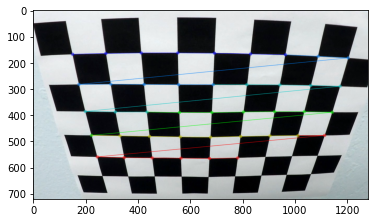

In [9]:
camera_matrix, dist_coeffs, rotation, translation, obj_points, img_points = calibrator(image_path_list, obj_point, pattern_size, criteria)

In [10]:
print('-- camera_matrix --')
print(camera_matrix)
print('-- dist_coeffs --')
print(dist_coeffs)
print('-- rotation --')
print(len(rotation), rotation[0].shape, rotation)
print('-- translation --')
print(len(translation), translation[0].shape, translation)

-- camera_matrix --
[[1.15694035e+03 0.00000000e+00 6.65948596e+02]
 [0.00000000e+00 1.15213869e+03 3.88785182e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-- dist_coeffs --
[[-2.37636647e-01 -8.54127267e-02 -7.90956208e-04 -1.15908662e-04
   1.05740909e-01]]
-- rotation --
17 (3, 1) (array([[0.0889157 ],
       [0.38639724],
       [0.05540614]]), array([[0.03581266],
       [0.64802446],
       [0.01020069]]), array([[ 0.17554667],
       [-0.05666302],
       [-0.00165643]]), array([[-0.19225085],
       [-0.75818271],
       [ 0.12062427]]), array([[-0.01958897],
       [ 0.38499981],
       [-0.00328611]]), array([[ 0.04403746],
       [-0.46088425],
       [-0.05739243]]), array([[ 0.02311025],
       [ 0.0253884 ],
       [-0.00571553]]), array([[ 0.51342887],
       [-0.21553737],
       [ 0.02807177]]), array([[ 0.21950547],
       [-0.06364439],
       [ 0.0117329 ]]), array([[-0.44755277],
       [-0.06303491],
       [-0.01832011]]), array([[0.03716193],
       [0.

## - Undistortion

### - cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, image_size, alpha, new_image_size)
    - Returns the new camera intrinsic matrix based on the free scaling parameter.
    - alpha: free scaling parameter between 0 (when all the pixels in the undistorted image are valid) and 1 (when all the source image pixels are retained in the undistorted image).
    - new_image_size: image size after rectification. By default, it is set to imageSize .

### - cv2.undistort(target_image, camera_matrix, dist_coeffs, new_camera_matrix)
    - Transforms an image to compensate for lens distortion.
    - The function transforms an image to compensate radial and tangential lens distortion.
    - A particular subset of the source image that will be visible in the corrected image can be regulated by new_camera_matrix. You can use getOptimalNewCameraMatrix to compute the appropriate new_camera_matrix depending on your requirements.
    - Returns undistorted image

In [11]:
img = cv2.imread('./camera_cal/calibration1.jpg')
h, w = img.shape[:2]

In [12]:
camera_matrix

array([[1.15694035e+03, 0.00000000e+00, 6.65948596e+02],
       [0.00000000e+00, 1.15213869e+03, 3.88785182e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w,h), 1)

In [14]:
new_camera_matrix, roi

(array([[989.62408447,   0.        , 673.49679021],
        [  0.        , 979.50170898, 390.27231396],
        [  0.        ,   0.        ,   1.        ]]),
 (37, 50, 1212, 628))

In [15]:
undistorted_img = cv2.undistort(img, camera_matrix, dist_coeffs, None, new_camera_matrix)

In [16]:
x, y, w, h = roi
undistorted_img = undistorted_img[y:y+h, x:x+w]

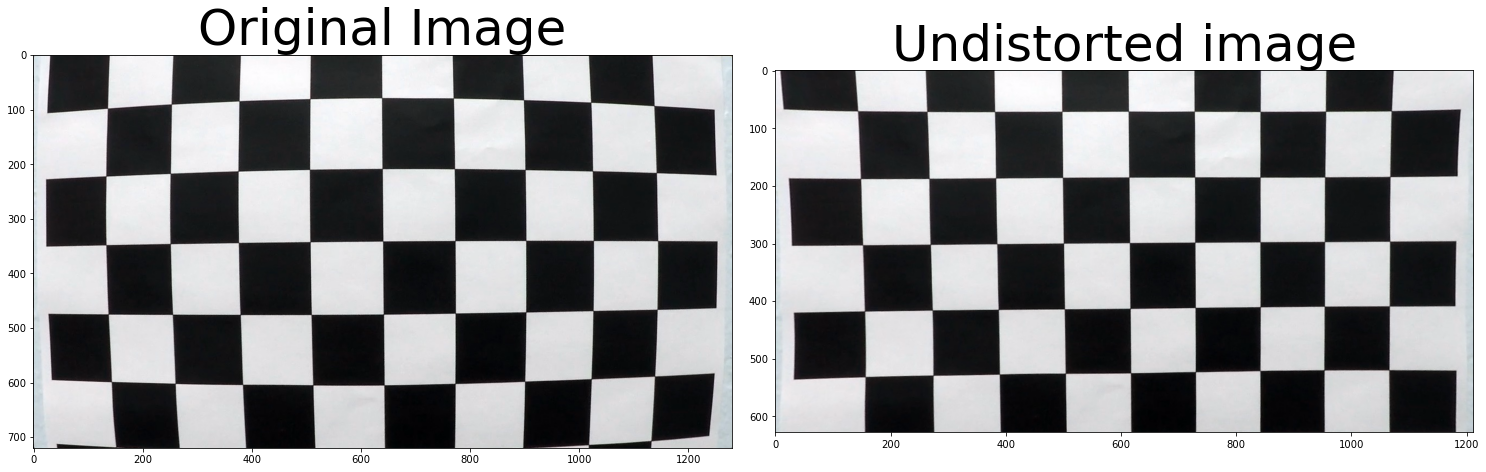

In [17]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.tight_layout()
ax1.set_title('Original Image', fontsize=50)
ax1.imshow(img)
ax2.set_title('Undistorted image', fontsize=50)
ax2.imshow(undistorted_img)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## - Reprojection Error

### -  cv2.projectPoints(obj_point, rotation, translation, camera_matrix, dist_coeffs)
    - Projects 3D points to an image plane

In [18]:
mean_error = 0
for i, (obj_point, img_point, r, t) in enumerate(zip(obj_points, img_points, rotation, translation)):
    p_img_point, _ = cv2.projectPoints(obj_point, r, t, camera_matrix, dist_coeffs)
    error = cv2.norm(img_point, p_img_point, cv2.NORM_L2)/len(p_img_point)
    mean_error += error
print("Total error : {0}".format(mean_error / len(obj_points)))

Total error : 0.1084144186411656
